# **Assignment 3: a baby project - Raymond Chen**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

# **NBA 2023-2024 Playoffs Player Statistics Dataset**

In [20]:
nba = pd.read_csv("NBA Stats 202324 All Stats  NBA Player Props Tool (4).csv")

## Finds the Summary Statistics 

In [22]:
# Check the column names
print(nba.columns)

# Check the data types
print(nba.info())

# Summary statistics
print(nba.describe())

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    213 non-null    int64  
 1   NAME    213 non-null    object 
 2   TEAM    213 non-null    object 
 3   POS     213 non-null    object 
 4   AGE     213 non-null    float64
 5   GP      213 non-null    int64  
 6   MPG     213 non-null    float64
 7   USG%    213 non-null    float64
 8   TO%     213 non-null    float64
 9   FTA     213 non-null    int64  
 10  FT%     213 non-null    float64
 11  2PA     213 non-null    int64  
 12  2P%     213 non-null    float64
 13  3PA     213 non-null    int64  
 14  3P%     213 non-null    float64
 15  eFG%   

In [38]:
print("There are ",nba.shape[0], " Rows")
print("There are ",nba.shape[1], " Columns")
print(nba.shape) #Displays the total Rows and Columns

There are  213  Rows
There are  29  Columns
(213, 29)


In [40]:
nba.describe(include  ="all").value_counts() #Counts the total Unique Values in each column

RANK   NAME  TEAM  POS  AGE    GP     MPG    USG%   TO%    FTA    FT%    2PA    2P%    3PA    3P%    eFG%   TS%    PPG    RPG    APG    SPG    BPG    TPG    P+R    P+A    P+R+A  VI     ORtg   DRtg 
213.0  213   213   213  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0  213.0    1
Name: count, dtype: int64

- The dataset is very clean and organized. It has each statistic under the correct column with the correct data type used.

# **Create some Summaries**

In [48]:
# Top 5 players in key stats
print("\nTop 5 Scorers:")
print(nba[['NAME', 'PPG']].sort_values(by='PPG', ascending=False).head())

print("\nTop 5 Rebounders:")
print(nba[['NAME', 'RPG']].sort_values(by='RPG', ascending=False).head())


print("\nTop 5 Assist Leaders:")
print(nba[['NAME', 'APG']].sort_values(by='APG', ascending=False).head())


Top 5 Scorers:
                      NAME   PPG
0              Joel Embiid  33.0
1            Jalen Brunson  32.4
2           Damian Lillard  31.3
3  Shai Gilgeous-Alexander  30.2
4             Tyrese Maxey  29.8

Top 5 Rebounders:
             NAME   RPG
9   Anthony Davis  15.6
32  Jarrett Allen  13.8
7    Nikola Jokic  13.4
47      Josh Hart  11.5
36   Bobby Portis  11.3

Top 5 Assist Leaders:
                 NAME  APG
8        LeBron James  8.8
7        Nikola Jokic  8.7
6         Luka Doncic  8.4
25  Tyrese Haliburton  8.2
20       James Harden  8.0


- Based on the data, Joel Embiid leads the scorers category, Anthony Davis leads the rebounders category, and Lebron James leads the assists category

In [51]:
# Team-level stats
team_stats = nba.groupby('TEAM')[['PPG', 'RPG', 'APG']].mean()
print("\nAverage Team Stats:")
print(team_stats.sort_values(by='PPG', ascending=False))


Average Team Stats:
            PPG       RPG       APG
TEAM                               
Lal   11.833333  4.577778  2.722222
Phi   11.090000  4.270000  2.420000
Nyk    9.521429  3.985714  1.800000
Cle    9.292308  4.076923  1.976923
Mil    8.907143  3.300000  1.778571
Ind    8.578571  3.135714  2.271429
Mia    8.533333  3.325000  1.975000
Lac    8.371429  3.585714  1.585714
Bos    8.333333  3.466667  1.713333
Okc    8.169231  3.276923  1.792308
Dal    7.942857  3.278571  1.585714
Den    7.742857  3.292857  1.821429
Min    7.653333  3.173333  1.726667
Pho    7.628571  2.528571  1.457143
Orl    7.173333  3.193333  1.433333
Nor    7.038462  3.715385  1.584615


- According to what is displayed, Los Angeles Lakers are the highest team by average of key stats, and New Orleans Pelicans are lowest

In [62]:
# Top 10 players in combined stats
print("\nTop 10 Players in P+R+A (Points + Rebounds + Assists):")
print(nba[['NAME', 'P+R+A']].sort_values(by='P+R+A', ascending=False).head(10))


Top 10 Players in P+R+A (Points + Rebounds + Assists):
                       NAME  P+R+A
7              Nikola Jokic   50.8
0               Joel Embiid   49.5
9             Anthony Davis   47.4
6               Luka Doncic   46.9
3   Shai Gilgeous-Alexander   43.8
8              LeBron James   43.4
1             Jalen Brunson   43.2
4              Tyrese Maxey   41.8
14             Jayson Tatum   41.5
10          Anthony Edwards   41.1


- This showcases the best player all around based off the three key statistics in basketball. Out of the Top 10 performers, Nikola Jokic leads the list.

# **Create some Graphs**

<Figure size 1200x600 with 0 Axes>

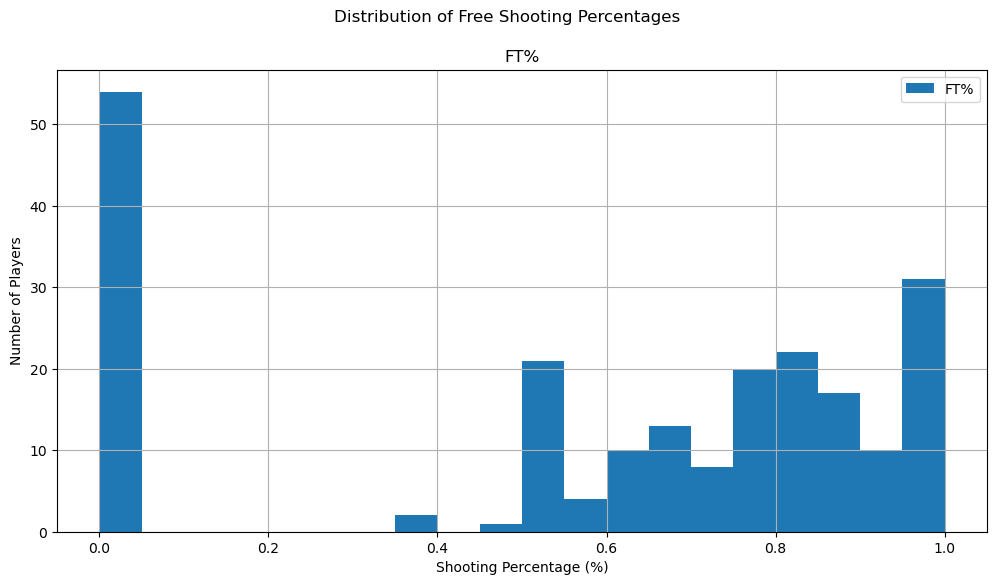

In [77]:
# Histograms for shooting percentages
plt.figure(figsize=(12, 6))
nba[['FT%']].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribution of Free Shooting Percentages")
plt.xlabel("Shooting Percentage (%)")
plt.ylabel("Number of Players")
plt.legend(["FT%"])
plt.show()


- The graph shows how the amount of players do in making their free throw shots by percentage

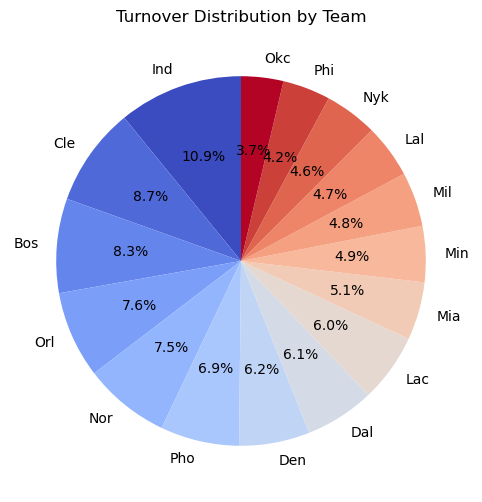

In [99]:
# Pie chart of teams with most turnovers
plt.figure(figsize=(10, 6))
turnover_stats = nba.groupby('TEAM')['TO%'].sum()
turnover_stats.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title("Turnover Distribution by Team")
plt.ylabel("")
plt.show()

- This graph showcases the teams with the highest percentage of turnovers (when a team loses possession of the ball). Indiana Pacers are recorded with having the highest amount and Oklahoma City Thunder have the least amount of turnovers in the 2024 NBA Playoffs.